In [357]:
%matplotlib inline

In [358]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [805]:
df = pd.read_csv('dramas.csv')

In [806]:
df = df.drop_duplicates(subset=['title'])

In [807]:
df.shape

(4885, 13)

In [1054]:
df.describe()

,episodes,rating,num_users_for_rating,watchers,num_users_for_reviews,start_month,start_year,end_month,end_year
count,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000
mean,29.494780,7.996008,1338.008802,2934.471034,8.396725,6.071238,2012.871238,6.337155,1946.233367
std,44.046684,0.589231,3846.775481,6998.187204,21.994979,3.443150,7.294187,3.596958,360.555281
min,1.000000,7.200000,1.000000,1.000000,0.000000,1.000000,1964.000000,0.000000,0.000000
25%,10.000000,7.600000,25.000000,140.000000,0.000000,3.000000,2010.000000,3.000000,2010.000000
50%,16.000000,7.900000,148.000000,531.000000,1.000000,6.000000,2015.000000,6.000000,2015.000000
75%,36.000000,8.200000,798.000000,2312.000000,6.000000,9.000000,2018.000000,9.000000,2018.000000
max,1128.000000,10.000000,50047.000000,84243.000000,376.000000,12.000000,2020.000000,12.000000,2020.000000


**Cleaning the data**

In [808]:
df[["start_date", "end_date"]] = df.date_aired.str.split("-", expand=True)
df = df.reindex(columns=['title', 'country', 'episodes', 'date_aired', 'start_date', 'end_date','network', 'actor_1', 'actor_2', 'rating', 'users', 'watchers', 'reviews', 'genre', 'tag'])

In [809]:
df.rename(columns={'users': 'num_users_for_rating', 'reviews': 'num_users_for_reviews'}, inplace=True)

- converting string time to date time

In [810]:
df.loc[:,'start_date'] =  pd.to_datetime(df.loc[:,'start_date'], infer_datetime_format=True)
df.loc[:,'end_date'] =  pd.to_datetime(df.loc[:,'end_date'], infer_datetime_format=True)

- columns for start/end months and years

In [811]:
df['start_month']=pd.DatetimeIndex(df['start_date']).month
df['start_year']=pd.DatetimeIndex(df['start_date']).year
df['end_month']=pd.DatetimeIndex(df['end_date']).month
df['end_year']=pd.DatetimeIndex(df['end_date']).year

In [812]:

df['end_month']=df['end_month'].fillna(0)
df['end_month']=df['end_month'].astype('Int64')
df['end_year']=df['end_year'].fillna(0)
df['end_year']=df['end_year'].astype('Int64')
df

,title,country,episodes,date_aired,start_date,end_date,network,actor_1,actor_2,rating,num_users_for_rating,watchers,num_users_for_reviews,genre,tag,start_month,start_year,end_month,end_year
0,The Untamed,China,50,"Jun 27, 2019 - Aug 7, 2019",2019-06-27,2019-08-07,Tencent Video,Sean Xiao,Wang Yi Bo,9.4,12453,23671,376,"Action, Adventure, Friendship, Historical, ...","Censored Romance, Strong Male Lead, Adapted Fr...",6,2019,8,2019
1,Stranger,South Korea,16,"Jun 10, 2017 - Jul 30, 2017",2017-06-10,2017-07-30,"tvN, Netflix, Netflix, Netflix, Netflix",Jo Seung Woo,Bae Doo Na,8.9,9291,22606,70,"Thriller, Mystery, Crime, Drama, Investiga...","Cold Man, Alexithymia, Strong Female Lead, Sma...",6,2017,7,2017
2,Eternal Love,China,58,"Jan 30, 2017 - Mar 1, 2017",2017-01-30,2017-03-01,ZJTV,Yang Mi,Mark Chao,9.0,10035,19733,184,"Adventure, Historical, Romance, Wuxia, Dra...","Male Chases Female First, Deity, Second Chance...",1,2017,3,2017
3,Kingdom: Season 2,South Korea,6,"Mar 13, 2020",2020-03-13,NaT,"Netflix, Netflix, Netflix, Netflix",Joo Ji Hoon,Ryu Seung Ryong,9.0,6272,10315,22,"Thriller, Historical, Horror, Drama, Zombies","Outbreak, Corruption, Strong Female Lead, Smar...",3,2020,0,0
4,Crash Landing on You,South Korea,16,"Dec 14, 2019 - Feb 16, 2020",2019-12-14,2020-02-16,"tvN, Netflix, Netflix, Netflix, Netflix",Hyun Bin,Son Ye Jin,9.0,24132,39633,211,"Military, Comedy, Romance, Drama, Political","North And South Korea, Lovers From Different C...",12,2019,2,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4983,Mr. Sunshine,South Korea,24,"Jul 7, 2018 - Sep 30, 2018",2018-07-07,2018-09-30,"tvN, Netflix, Netflix, Netflix, Netflix",Lee Byung Hun,Kim Tae Ri,8.9,8602,22745,81,"Action, Military, Historical, Romance, Tra...","Strong Female Lead, Bromance, Foreigner, Soldi...",7,2018,9,2018
4984,Goblin,South Korea,16,"Dec 2, 2016 - Jan 21, 2017",2016-12-02,2017-01-21,tvN,Gong Yoo,Kim Go Eun,8.9,49838,84243,276,"Comedy, Romance, Fantasy, Melodrama, Super...","Interspecies Romance, Older Man/Younger Woman,...",12,2016,1,2017
4985,Prison Playbook,South Korea,16,"Nov 22, 2017 - Jan 18, 2018",2017-11-22,2018-01-18,"tvN, Netflix, Netflix, Netflix, Netflix",Park Hae Soo,Jung Kyung Ho,9.2,9802,25374,77,"Friendship, Comedy, Romance, Life, Drama","Prison, Bromance, Black Comedy, Slight Romance...",11,2017,1,2018
4986,Hospital Playlist,South Korea,12,"Mar 12, 2020 - May 28, 2020",2020-03-12,2020-05-28,"tvN, Netflix, Netflix, Netflix, Netflix",Jo Jung Suk,Yoo Yeon Seok,9.3,8398,18561,89,"Friendship, Comedy, Romance, Life, Drama, ...","Strong Friendship, Slice Of Life, Doctor, Mult...",3,2020,5,2020


- create new dataframe with removal of duplicates in 'network' column

In [813]:
network_df = df[df['network'].notnull()]

In [814]:
class ChainedAssignent:
    def __init__(self, chained=None):
        acceptable = [None, 'warn', 'raise']
        assert chained in acceptable, "chained must be in " + str(acceptable)
        self.swcw = chained

    def __enter__(self):
        self.saved_swcw = pd.options.mode.chained_assignment
        pd.options.mode.chained_assignment = self.swcw
        return self

    def __exit__(self, *args):
        pd.options.mode.chained_assignment = self.saved_swcw


def remove_dup(string):
    return ', '.join(list(dict.fromkeys(string.strip().split(', '))))

with ChainedAssignent():
    network_df['network'] = network_df['network'].apply(lambda x: remove_dup(x))

In [815]:
network_df.head()

,title,country,episodes,date_aired,start_date,end_date,network,actor_1,actor_2,rating,num_users_for_rating,watchers,num_users_for_reviews,genre,tag,start_month,start_year,end_month,end_year
0,The Untamed,China,50,"Jun 27, 2019 - Aug 7, 2019",2019-06-27,2019-08-07,Tencent Video,Sean Xiao,Wang Yi Bo,9.4,12453,23671,376,"Action, Adventure, Friendship, Historical, ...","Censored Romance, Strong Male Lead, Adapted Fr...",6,2019,8,2019
1,Stranger,South Korea,16,"Jun 10, 2017 - Jul 30, 2017",2017-06-10,2017-07-30,"tvN, Netflix",Jo Seung Woo,Bae Doo Na,8.9,9291,22606,70,"Thriller, Mystery, Crime, Drama, Investiga...","Cold Man, Alexithymia, Strong Female Lead, Sma...",6,2017,7,2017
2,Eternal Love,China,58,"Jan 30, 2017 - Mar 1, 2017",2017-01-30,2017-03-01,ZJTV,Yang Mi,Mark Chao,9.0,10035,19733,184,"Adventure, Historical, Romance, Wuxia, Dra...","Male Chases Female First, Deity, Second Chance...",1,2017,3,2017
3,Kingdom: Season 2,South Korea,6,"Mar 13, 2020",2020-03-13,NaT,Netflix,Joo Ji Hoon,Ryu Seung Ryong,9.0,6272,10315,22,"Thriller, Historical, Horror, Drama, Zombies","Outbreak, Corruption, Strong Female Lead, Smar...",3,2020,0,0
4,Crash Landing on You,South Korea,16,"Dec 14, 2019 - Feb 16, 2020",2019-12-14,2020-02-16,"tvN, Netflix",Hyun Bin,Son Ye Jin,9.0,24132,39633,211,"Military, Comedy, Romance, Drama, Political","North And South Korea, Lovers From Different C...",12,2019,2,2020


In [816]:
genres_df = df[df['genre'].notnull()]

In [817]:
tags_df = df[df['tag'].notnull()]

- create dataframe without outliers in number of raters and watchers

In [906]:
df_no_outliers = df[['title','num_users_for_rating', 'watchers']]
df_no_outliers = df_no_outliers.set_index('title')
df_no_outliers = df_no_outliers.loc[df_no_outliers.apply(lambda x: np.abs(x - x.mean()) / x.std() < 2).all(axis=1)]
df_no_outliers = df_no_outliers.reset_index()

In [907]:
df_2 = df[['title', 'country', 'start_date', 'end_date', 'network', 'actor_1', 'actor_2', 'rating', 'num_users_for_reviews', 'genre', 'tag']]

In [908]:
df_clean=pd.merge(df_no_outliers, df_2, on='title')

In [909]:
df_clean.shape

(4682, 13)

In [910]:
network_df2 = df_clean[df_clean['network'].notnull()]

class ChainedAssignent:
    def __init__(self, chained=None):
        acceptable = [None, 'warn', 'raise']
        assert chained in acceptable, "chained must be in " + str(acceptable)
        self.swcw = chained

    def __enter__(self):
        self.saved_swcw = pd.options.mode.chained_assignment
        pd.options.mode.chained_assignment = self.swcw
        return self

    def __exit__(self, *args):
        pd.options.mode.chained_assignment = self.saved_swcw


def remove_dup(string):
    return ', '.join(list(dict.fromkeys(string.strip().split(', '))))

with ChainedAssignent():
    network_df2['network'] = network_df2['network'].apply(lambda x: remove_dup(x))

network_df2.shape

(4391, 13)

In [911]:
genres_df2 = df_clean[df_clean['genre'].notnull()]

In [912]:
tags_df2 = df_clean[df_clean['tag'].notnull()]

**Visualizing the data**

- Data of dramas throughout the years

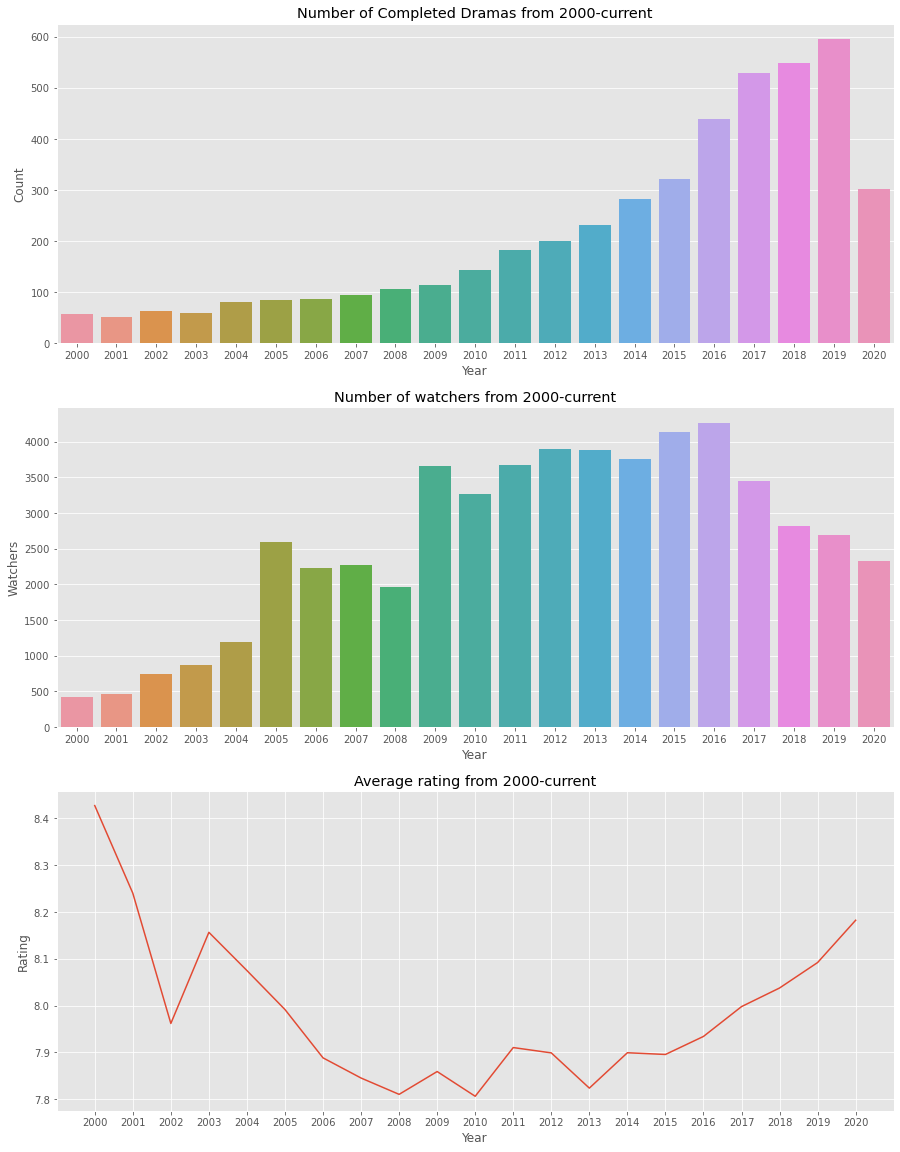

In [1048]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(15, 20))

year_df=df[df['start_year']>1999]

year_count_df = year_df.groupby('start_year')[['title']].count()
year_count_df = year_count_df.reset_index()
sns.barplot(x='start_year', y='title', data=year_count_df, ax=ax1)
#ax1.set_xticks(rotation='45')
ax1.set_xlabel('Year')
ax1.set_ylabel('Count')
ax1.set_title('Number of Completed Dramas from 2000-current')

year_watch_df=year_df.groupby('start_year')[['watchers']].mean()
year_watch_df = year_watch_df.reset_index()
sns.barplot(x='start_year', y='watchers', data=year_watch_df, ax=ax2)
#ax2.set_xticks(rotation='45')
ax2.set_xlabel('Year')
ax2.set_ylabel('Watchers')
ax2.set_title('Number of watchers from 2000-current')

year_rating_df=year_df.groupby('start_year')[['rating']].mean()
year_rating_df = year_rating_df.reset_index()
sns.lineplot(x='start_year', y='rating', data=year_rating_df, ax=ax3)
ax3.set_xlabel('Year')
ax3.set_ylabel('Rating')
ax3.set_title('Average rating from 2000-current')
ax3.set_xticks(range(2000,2021))
plt.show()

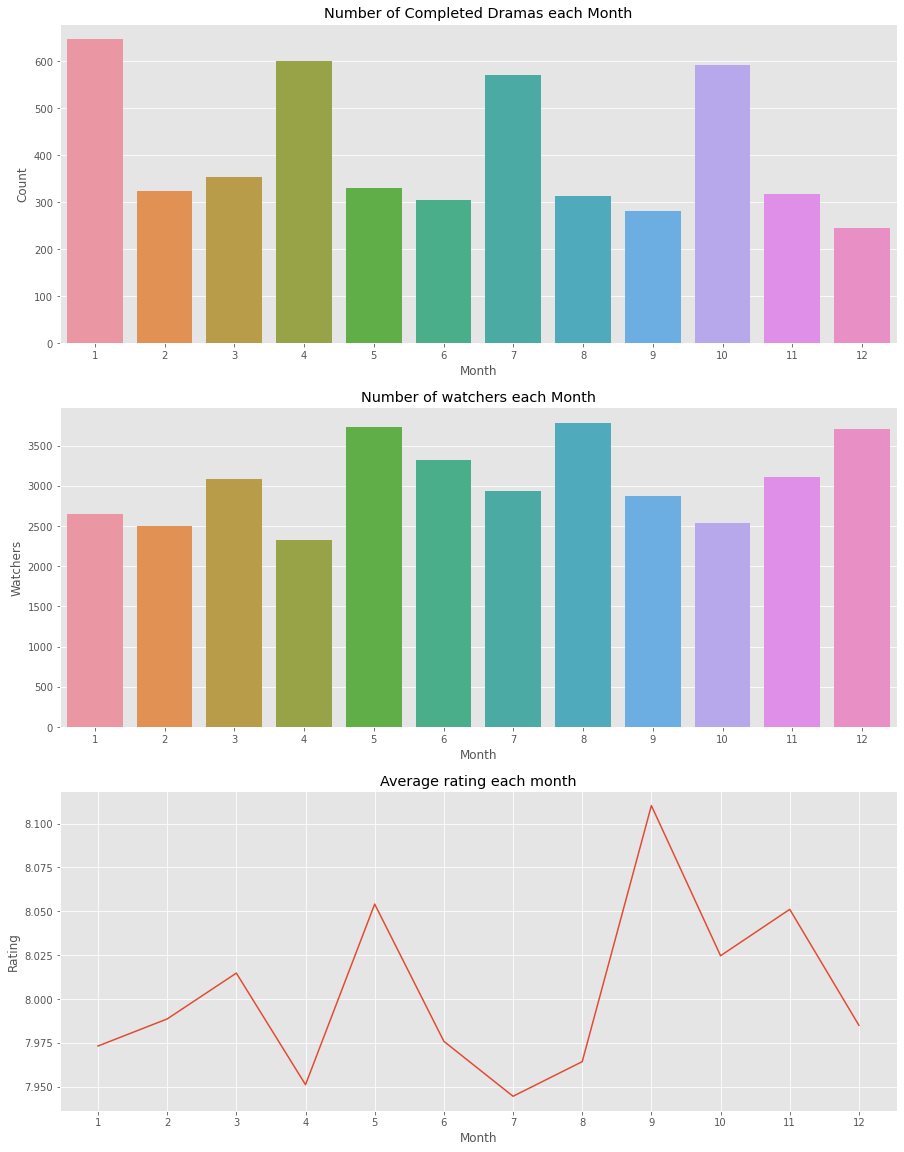

In [1047]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(15, 20))


month_count_df = df.groupby('start_month')[['title']].count()
month_count_df = month_count_df.reset_index()
sns.barplot(x='start_month', y='title', data=month_count_df, ax=ax1)
#ax1.set_xticks(rotation='45')
ax1.set_xlabel('Month')
ax1.set_ylabel('Count')
ax1.set_title('Number of Completed Dramas each Month')

month_watch_df=df.groupby('start_month')[['watchers']].mean()
month_watch_df = month_watch_df.reset_index()
sns.barplot(x='start_month', y='watchers', data=month_watch_df, ax=ax2)
#ax2.set_xticks(rotation='45')
ax2.set_xlabel('Month')
ax2.set_ylabel('Watchers')
ax2.set_title('Number of watchers each Month')

month_rating_df=df.groupby('start_month')[['rating']].mean()
month_rating_df = month_rating_df.reset_index()
sns.lineplot(x='start_month', y='rating', data=month_rating_df, ax=ax3)
#ax3.set_xticks(rotation='45')
ax3.set_xlabel('Month')
ax3.set_ylabel('Rating')
ax3.set_title('Average rating each month')
ax3.set_xticks(range(1,13))
plt.show()


- Which country produces most dramas and which country's dramas are watched, rated, and reviewed the most?

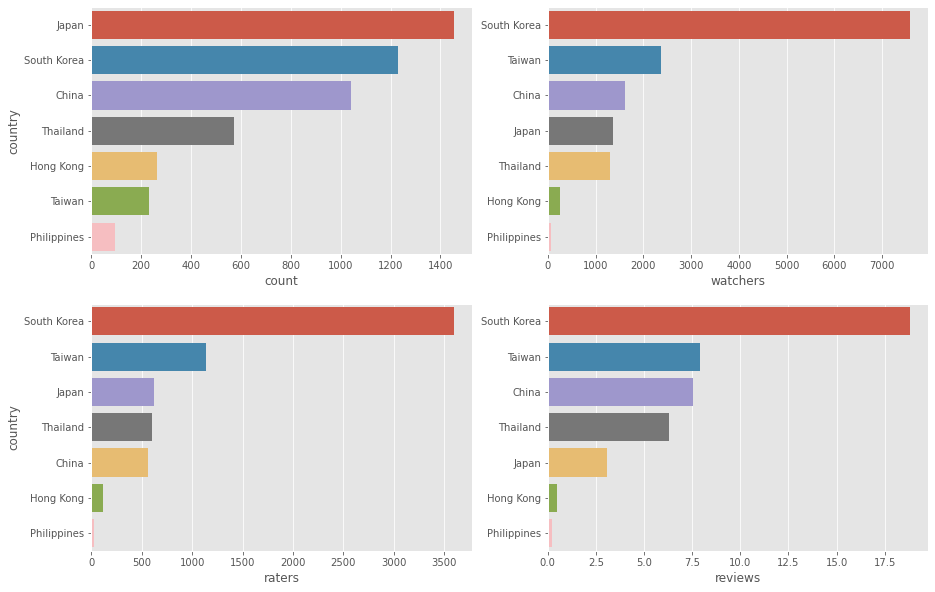

In [741]:
fig, [[ax1, ax2],[ax3, ax4]] = plt.subplots(2,2, figsize=(15,10))
# plt.subplots_adjust(hspace=0.3)

country_df = df.groupby('country')[['title']].count()
country_df = country_df.reset_index()
sns.barplot(y='country', x='title', data=country_df, order=country_df.sort_values('title', ascending=False).country, ax=ax1)
ax1.set_xlabel('count')                      

watchers_df = df.groupby('country')[['watchers']].mean()
watchers_df = watchers_df.reset_index()
sns.barplot(y='country', x='watchers', data=watchers_df, order=watchers_df.sort_values('watchers', ascending=False).country, ax=ax2)
ax2.set_ylabel("")
    
users_df = df.groupby('country')[['num_users_for_rating']].mean()
users_df = users_df.reset_index()
sns.barplot(y='country', x='num_users_for_rating', data=users_df, order=users_df.sort_values('num_users_for_rating', ascending=False).country, ax=ax3)
ax3.set_xlabel('raters') 

reviews_df = df.groupby('country')[['num_users_for_reviews']].mean()
reviews_df = reviews_df.reset_index()
sns.barplot(y='country', x='num_users_for_reviews', data=reviews_df, order=reviews_df.sort_values('num_users_for_reviews', ascending=False).country, ax=ax4)
ax4.set_xlabel('reviews') 
ax4.set_ylabel("")

plt.show()                             

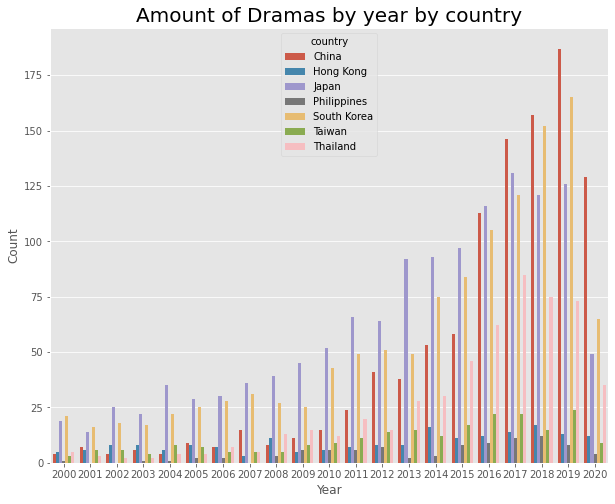

In [922]:
plt.figure(figsize=(10,8))
year_10_df=df[df['start_year']>1999]
country_year_df=year_10_df.groupby(['country', 'start_year'])[['title']].count()
country_year_df=country_year_df.reset_index()

sns.barplot(x='start_year', y='title', hue='country', data=country_year_df)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Amount of Dramas by year by country', size=20)
plt.show()

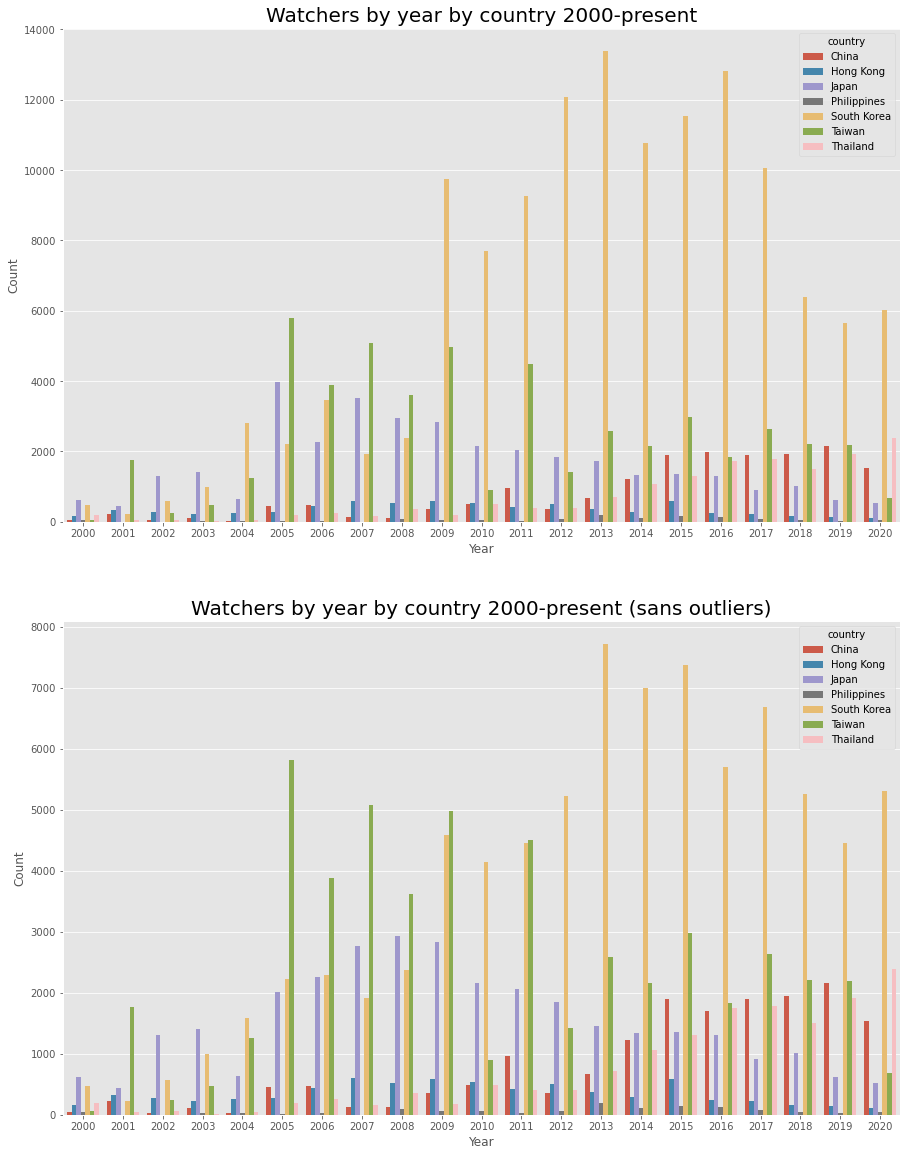

In [918]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(15, 20))

year_10_df=df[df['start_year']>1999]
country_watch_year_df=year_10_df.groupby(['country', 'start_year'])[['watchers']].mean()
country_watch_year_df=country_watch_year_df.reset_index()

sns.barplot(x='start_year', y='watchers', hue='country', data=country_watch_year_df, ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('Count')
ax1.set_title('Watchers by year by country 2000-present', size=20)


year_10_df2 = year_10_df[np.abs(year_10_df['watchers'] - year_10_df['watchers'].mean()) / year_10_df['watchers'].std() < 3]
country_watch_year_df2=year_10_df2.groupby(['country', 'start_year'])[['watchers']].mean()
country_watch_year_df2=country_watch_year_df2.reset_index()

sns.barplot(x='start_year', y='watchers', hue='country', data=country_watch_year_df2, ax=ax2)
ax2.set_xlabel('Year')
ax2.set_ylabel('Count')
ax2.set_title('Watchers by year by country 2000-present (sans outliers)', size=20)

plt.show()

- Which country has dramas with higher ratings?

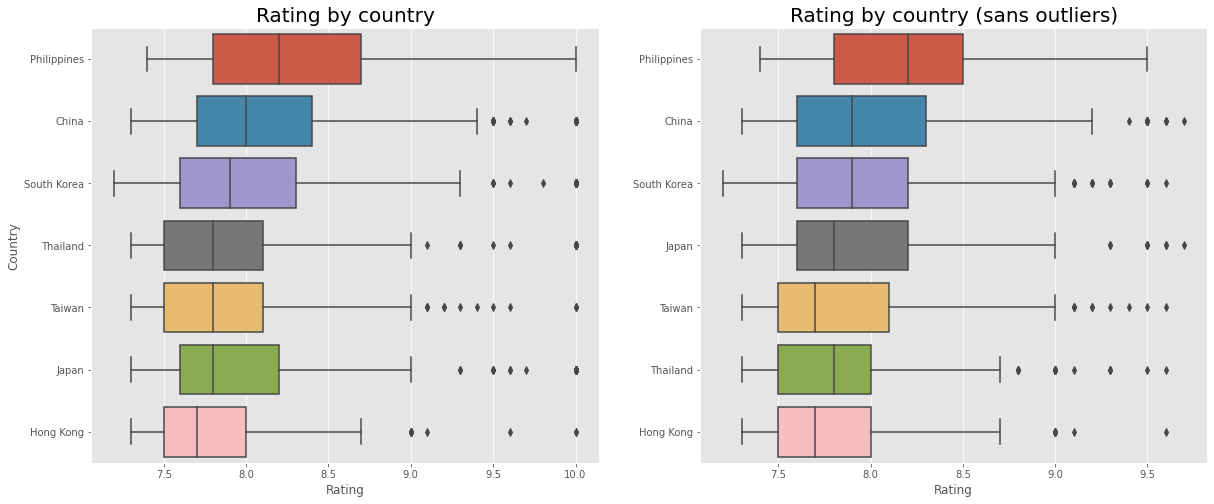

In [1052]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 8))
plt.subplots_adjust(wspace=0.2)

country_order=df.groupby(['country'])['rating'].median().sort_values(ascending=False).index
sns.boxplot(x='rating', y='country', data = df, order=country_order, ax=ax1)
#sns.stripplot(x='rating', y='country', color='black', alpha=0.75, data=df, order=country_order)
ax1.set_xlabel("Rating")
ax1.set_ylabel("Country")
ax1.set_title("Rating by country", size=20)

user_rating_df=df[['country', 'rating']]
user_rating_df2 = user_rating_df.set_index('country')
user_rating_df2 = user_rating_df2.loc[user_rating_df2.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
user_rating_df2 = user_rating_df2.reset_index()
user_rating_df3=user_rating_df2.groupby(['country'])['rating'].mean().sort_values(ascending=False).index
sns.boxplot(x='rating', y='country', data = user_rating_df2, order= user_rating_df3, ax=ax2)
ax2.set_xlabel("Rating")
ax2.set_ylabel("")
ax2.set_title("Rating by country (sans outliers)", size=20)

# country_100_df = user_rating_df2.groupby('country').filter(lambda x: x.shape[0]>100)
# country_100_order_df=country_100_df.groupby(['country'])['rating'].mean().sort_values(ascending=False).index
# sns.boxplot(x='rating', y='country', data=country_100_df, order=country_100_order_df , ax=ax2)
# ax2.set_xlabel("Rating")
# ax2.set_ylabel("")
# ax2.set_title("Rating by country >100 dramas", size=20)

plt.show()

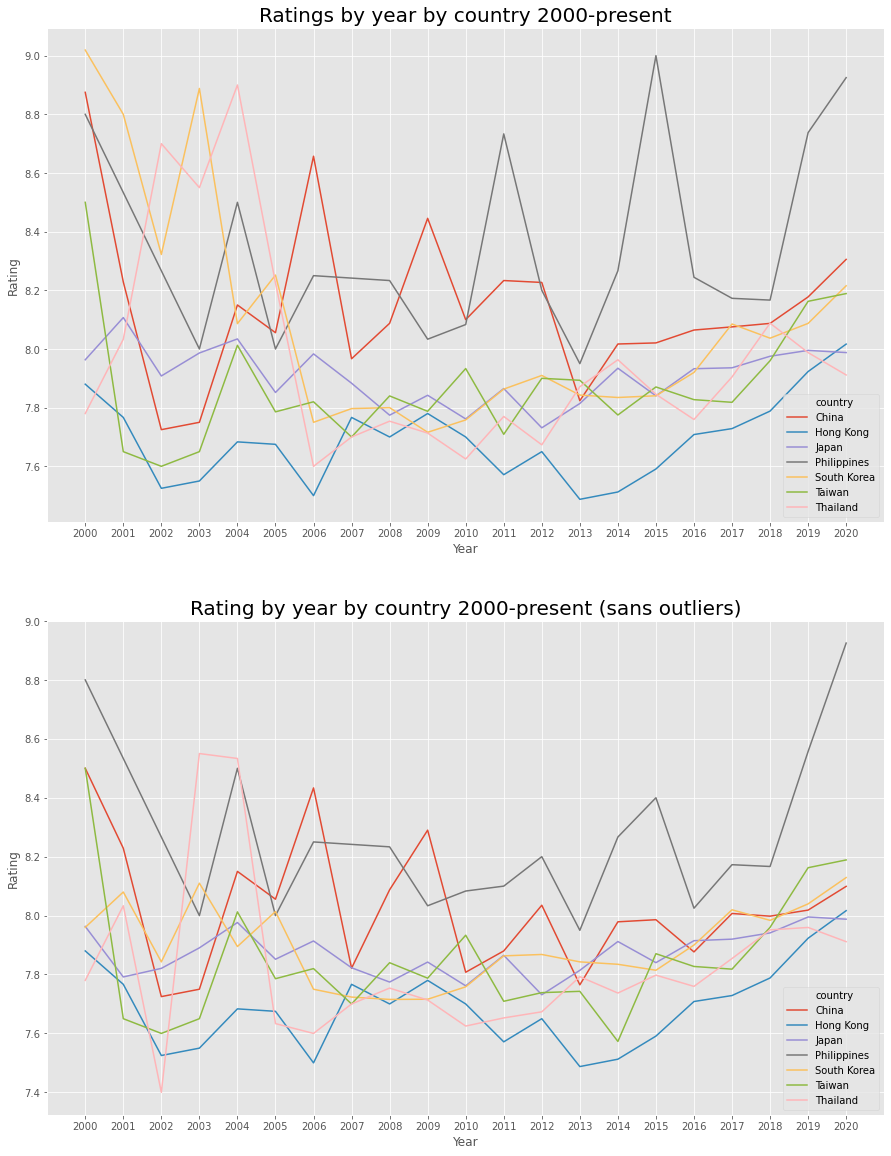

In [950]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(15, 20))

year_df=df[df['start_year']>1999]
rating_year_country_df=year_df.groupby(['country', 'start_year'])[['rating']].mean()
rating_year_country_df=rating_year_country_df.reset_index()

sns.lineplot(x='start_year', y='rating', hue='country', data=rating_year_country_df, ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('Rating')
ax1.set_title('Ratings by year by country 2000-present', size=20)
ax1.set_xticks(range(2000,2021))

year_df2 = year_df[np.abs(year_10_df['rating'] - year_df['rating'].mean()) / year_df['rating'].std() < 3]
rating_year_country_df2=year_df2.groupby(['country', 'start_year'])[['rating']].mean()
rating_year_country_df2=rating_year_country_df2.reset_index()

sns.lineplot(x='start_year', y='rating', hue='country', data=rating_year_country_df2, ax=ax2)
ax2.set_xlabel('Year')
ax2.set_ylabel('Rating')
ax2.set_title('Rating by year by country 2000-present (sans outliers)', size=20)
ax2.set_xticks(range(2000,2021))

plt.show()

- Is there correlation between amount of watchers and rating?

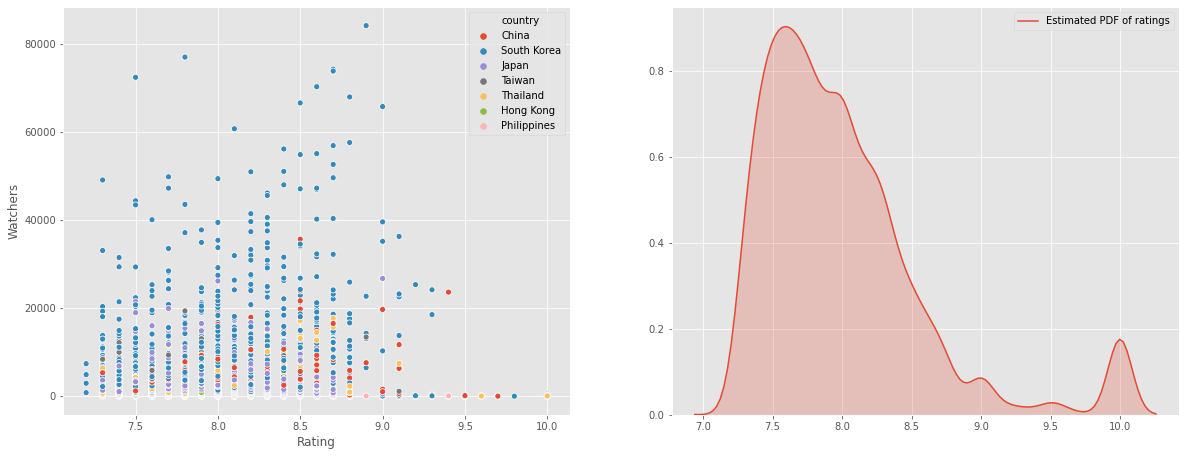

In [1091]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,7.5))
# plt.subplots_adjust(wspace=0.2)

# user_rating_df = df[['country','rating', 'num_users_for_rating']]
# sns.scatterplot(x='num_users_for_rating',y='rating', hue='country', data=user_rating_df, ax=ax1)
# ax1.set_xlabel('raters')

watcher_rating_df = df[['country','rating', 'watchers']]
sns.scatterplot(y='watchers',x='rating', hue='country', data=watcher_rating_df, ax=ax1)
ax1.set_xlabel('Rating')
ax1.set_ylabel('Watchers')

sns.kdeplot(df['rating'], shade=True, label='Estimated PDF of ratings', ax=ax2)
# sns.regplot(x="watchers", y="num_users_for_rating", data=df, ax=ax3)
# ax3.set_xlabel('watchers')
# ax3.set_ylabel('raters')

plt.show()

- Do watchers watch a certain network more?

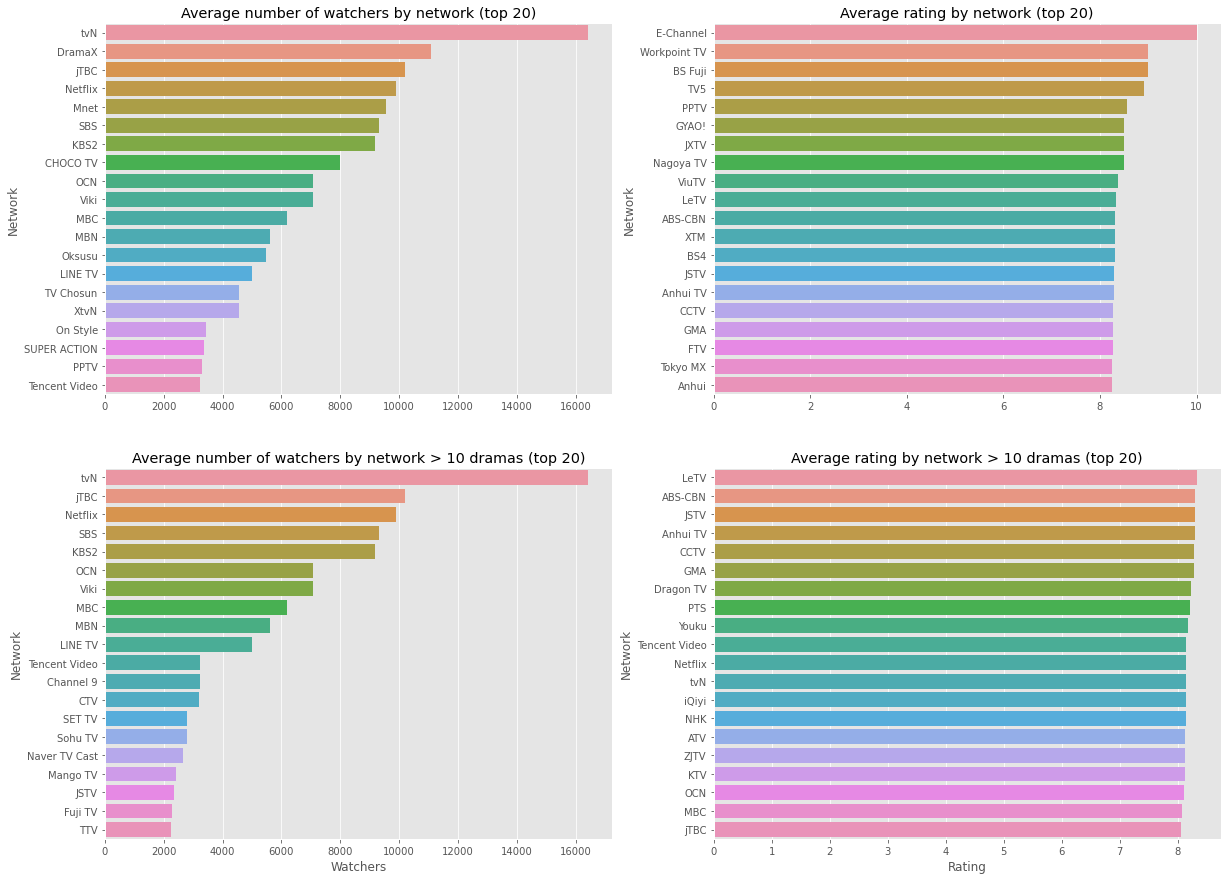

<Figure size 576x432 with 0 Axes>

In [1093]:
fig, [[ax1, ax2],[ax3, ax4]] = plt.subplots(2,2, figsize=(20, 15))

E= (zip(network_df.network.str.split(', '), network_df['watchers']))
F = (map(lambda t:list(zip(t[0],[t[1]]*len(t[0]))), E))
e, f = zip(*sum(F,[]))
network_watchers_df = pd.DataFrame({'network':e,'watchers':f})

order_1 = network_watchers_df.groupby('network')['watchers'].mean().sort_values(ascending=False).head(20).index
sns.barplot(y='network', x='watchers', data=network_watchers_df, order=order_1, ci=None, ax=ax1)
ax1.set_xlabel('')
ax1.set_ylabel('Network')
ax1.set_title('Average number of watchers by network (top 20)')

country_10_df = network_watchers_df.groupby('network').filter(lambda x: x.shape[0]>10)
order_2 = country_10_df.groupby('network')['watchers'].mean().sort_values(ascending=False).head(20).index
sns.barplot(y='network', x='watchers', data=country_10_df, order=order_2, ci=None, ax=ax3)
ax3.set_xlabel('Watchers')
ax3.set_ylabel('Network')
ax3.set_title('Average number of watchers by network > 10 dramas (top 20)')

A= (zip(network_df.network.str.split(', '), network_df['rating']))
B = (map(lambda t:list(zip(t[0],[t[1]]*len(t[0]))), A))
a, b = zip(*sum(B,[]))
network_rating_df = pd.DataFrame({'network':a,'rating':b})
network_rating_df.network=network_rating_df.network.str.strip()

order_4 = network_rating_df.groupby('network')['rating'].mean().sort_values(ascending=False).head(20).index
plt.figure(figsize=(8,6))
sns.barplot(y='network', x='rating', data=network_rating_df, order=order_4, ci=None, ax=ax2)
ax2.set_xlabel('')
ax2.set_ylabel('Network')
ax2.set_title('Average rating by network (top 20)')

network_10_df = network_rating_df.groupby('network').filter(lambda x: x.shape[0]>10)
order_3 = network_10_df.groupby('network')['rating'].mean().sort_values(ascending=False).head(20).index
sns.barplot(y='network', x='rating', data=network_10_df, order=order_3, ci=None, ax=ax4)
ax4.set_xlabel('Rating')
ax4.set_ylabel('Network')
ax4.set_title('Average rating by network > 10 dramas (top 20)')
# G= (zip(network_df2.network.str.split(', '), network_df2['watchers']))
# H = (map(lambda t:list(zip(t[0],[t[1]]*len(t[0]))), G))
# g, h = zip(*sum(H,[]))
# network_watchers_df2 = pd.DataFrame({'network':g,'watchers':h})

# order_10 = network_watchers_df2.groupby('network')['watchers'].mean().sort_values(ascending=False).head(20).index
# sns.barplot(y='network', x='watchers', data=network_watchers_df2, order=order_10, ci=None, ax=ax2)
# ax2.set_xlabel('')
# ax2.set_ylabel('')
# ax2.set_title('Average number of watchers by network (top 20) without outliers')

# country_10_df2 = network_watchers_df2.groupby('network').filter(lambda x: x.shape[0]>10)
# order_11 = country_10_df2.groupby('network')['watchers'].mean().sort_values(ascending=False).head(20).index
# sns.barplot(y='network', x='watchers', data=country_10_df2, order=order_11, ci=None, ax=ax4)
# ax4.set_xlabel('Watchers')
# ax4.set_ylabel('')
# ax4.set_title('Average number of watchers by network > 10 dramas (top 20) without outliers')

plt.show()

- do watchers prefer a particular genre more?

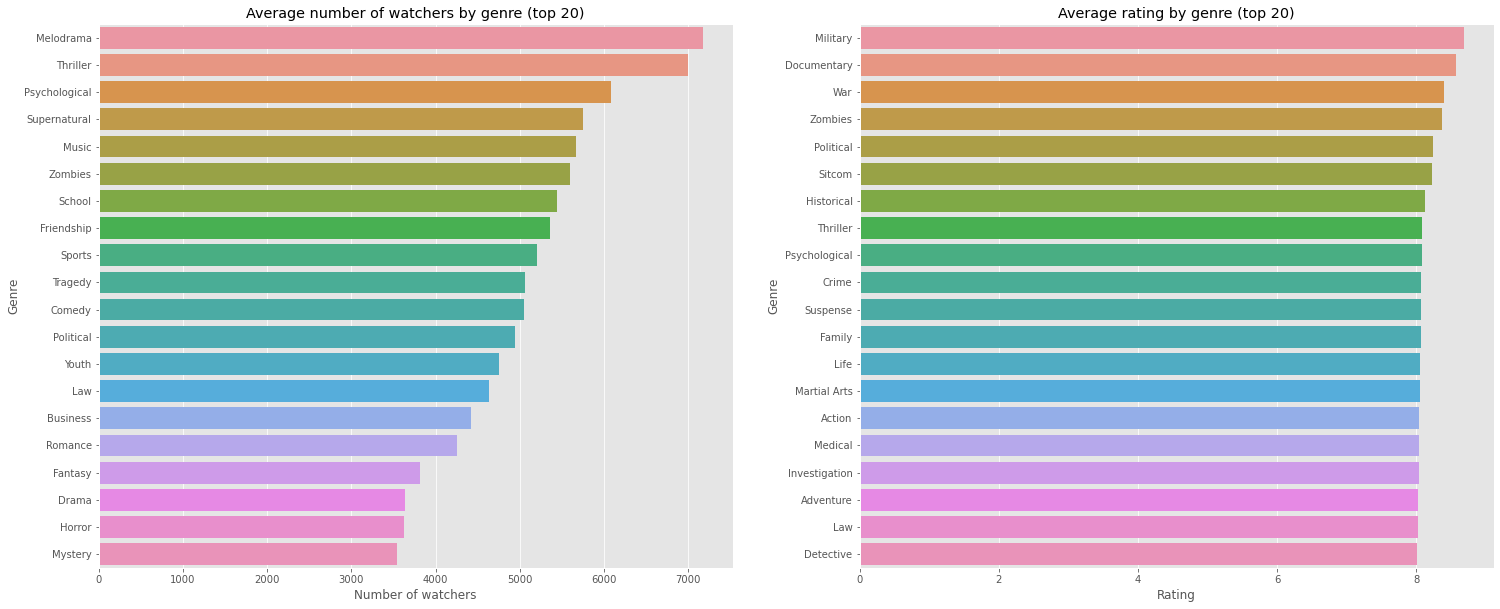

In [1097]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25,10))

X= (zip(genres_df.genre.str.split(','), genres_df['watchers']))
Y = (map(lambda t:list(zip(t[0],[t[1]]*len(t[0]))), X))
a, b = zip(*sum(Y,[]))
genres_watchers_df = pd.DataFrame({'genre':a,'watchers':b})
genres_watchers_df.genre=genres_watchers_df.genre.str.strip()

genre_order = genres_watchers_df.groupby('genre')['watchers'].mean().sort_values(ascending=False).head(20).index
sns.barplot(y='genre', x='watchers', data=genres_watchers_df, order=genre_order, ci=None, ax=ax1)
ax1.set_xlabel('Number of watchers')
ax1.set_ylabel('Genre')
ax1.set_title('Average number of watchers by genre (top 20)')

A= (zip(genres_df.genre.str.split(','), genres_df['rating']))
B = (map(lambda t:list(zip(t[0],[t[1]]*len(t[0]))), A))
c, d = zip(*sum(B,[]))
genres_ratings_df = pd.DataFrame({'genre':c,'rating':d})
genres_ratings_df.genre=genres_ratings_df.genre.str.strip()

genre_rating_order = genres_ratings_df.groupby('genre')['rating'].mean().sort_values(ascending=False).head(20).index
sns.barplot(y='genre', x='rating', data=genres_ratings_df, order=genre_rating_order, ci=None, ax=ax2)
ax2.set_xlabel('Rating')
ax2.set_ylabel('Genre')
ax2.set_title('Average rating by genre (top 20)')

plt.show(_)

- who are the top actors?

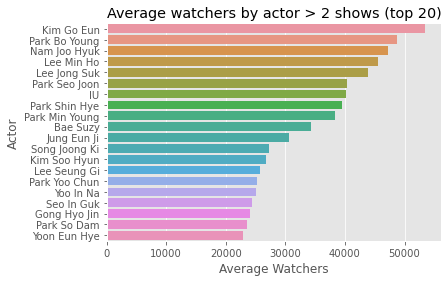

In [1092]:
actor1_df=df[['actor_1', 'title', 'watchers']]
actor1_df= actor1_df.rename(columns={'actor_1':'actor'})

actor2_df=df[['actor_2', 'title', 'watchers']]
actor2_df= actor2_df.rename(columns={'actor_2':'actor'})

actor_df= pd.concat([actor1_df, actor2_df], axis=0)
actor_df2 = actor_df.groupby('actor').agg({'title':'count', 'watchers':'sum'})
actor_df2['watchers_per_drama'] = actor_df2.watchers/actor_df2.title
actor_df3 = actor_df2.sort_values('watchers_per_drama', ascending=False)
actor_df3 = actor_df3.loc[actor_df3.title>2].head(20).reset_index()

sns.barplot(y="actor", x='watchers_per_drama', data=actor_df3, ci=None)
plt.xlabel('Average Watchers')
plt.ylabel('Actor')
plt.title('Average watchers by actor > 2 shows (top 20)')
plt.show()

**Currently Airing Dramas**

In [871]:
df2 = pd.read_csv('dramas_ongoing.csv')

In [872]:
df2.dtypes

actor_1        object
actor_2        object
country        object
date_aired     object
episodes        int64
genre          object
network        object
rating        float64
tag            object
title          object
users           int64
watchers        int64
dtype: object

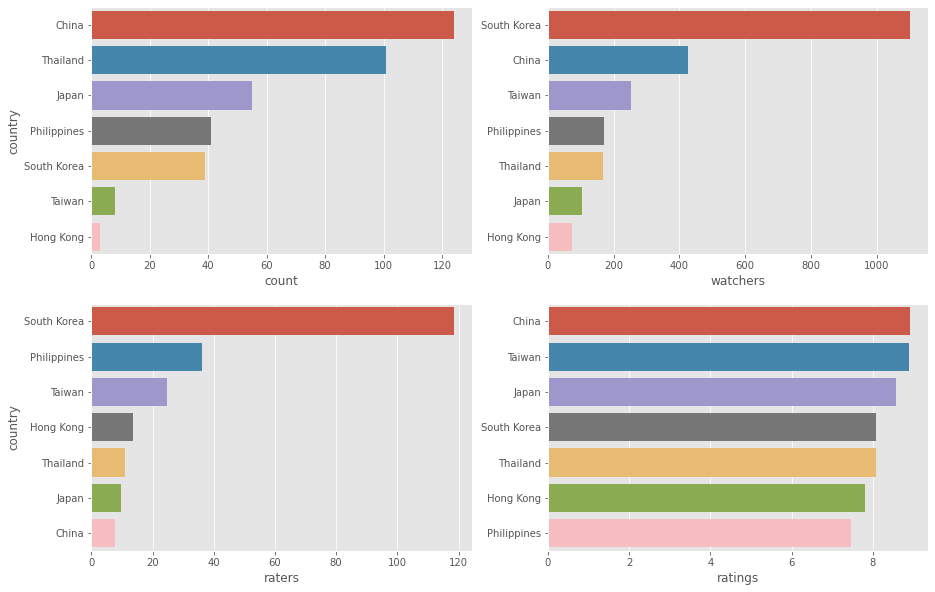

In [973]:
fig, [[ax1, ax2],[ax3, ax4]] = plt.subplots(2,2, figsize=(15,10))
# plt.subplots_adjust(hspace=0.3)

country2_df = df2.groupby('country')[['title']].count()
country2_df = country2_df.reset_index()
sns.barplot(y='country', x='title', data=country2_df, order=country2_df.sort_values('title', ascending=False).country, ax=ax1)
ax1.set_xlabel('count')                      

watchers2_df = df2.groupby('country')[['watchers']].mean()
watchers2_df = watchers2_df.reset_index()
sns.barplot(y='country', x='watchers', data=watchers2_df, order=watchers2_df.sort_values('watchers', ascending=False).country, ax=ax2)
ax2.set_ylabel("")
    
users2_df = df2.groupby('country')[['users']].mean()
users2_df = users2_df.reset_index()
sns.barplot(y='country', x='users', data=users2_df, order=users2_df.sort_values('users', ascending=False).country, ax=ax3)
ax3.set_xlabel('raters') 

ratings2_df = df2.groupby('country')[['rating']].mean()
ratings2_df = ratings2_df.reset_index()
sns.barplot(y='country', x='rating', data=ratings2_df, order=ratings2_df.sort_values('rating', ascending=False).country, ax=ax4)
ax4.set_xlabel('ratings') 
ax4.set_ylabel("")

plt.show() 